In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# UK Guidelines:

# mean gender pay gap in hourly pay
# median gender pay gap in hourly pay
# mean bonus gender pay gap
# median bonus gender pay gap
# proportion of males and females receiving a bonus payment
# proportion of males and females in each pay quartile

In [ ]:
# NOTE:

# There is a lot of bad data for bonuses as +/- 100% is max but many companies exceed this
# Once bad data is removed, data looks pretty usable at around 8.5K data points

In [3]:
borig = pd.read_csv('UK Gender Pay Gap Data - 2018 to 2019.csv', header=0)

print(borig.shape)

(10776, 25)


In [4]:
borig.head(2)

,EmployerName,Address,CompanyNumber,SicCodes,DiffMeanHourlyPercent,DiffMedianHourlyPercent,DiffMeanBonusPercent,DiffMedianBonusPercent,MaleBonusPercent,FemaleBonusPercent,...,FemaleUpperMiddleQuartile,MaleTopQuartile,FemaleTopQuartile,CompanyLinkToGPGInfo,ResponsiblePerson,EmployerSize,CurrentName,SubmittedAfterTheDeadline,DueDate,DateSubmitted
0,"""Bryanston School"",Incorporated","Bryanston House,\r\nBlandford,\r\nDorset,\r\nU...",00226143,85310,19.6,32.5,NaN,NaN,0.0,0.0,...,55.1,53.3,46.7,https://www.bryanston.co.uk/employment,Michael McGovern (Chief Operating Officer),500 to 999,"""Bryanston School"",Incorporated",False,05/04/2019 00:00:00,03/04/2019 13:43:34
1,"""RED BAND"" CHEMICAL COMPANY, LIMITED","19 Smith's Place,\r\nLeith Walk,\r\nEdinburgh,...",SC016876,47730,7.7,-4.2,23.7,-75.2,22.2,82.0,...,88.4,20.3,79.7,NaN,Philip Galt (Managing Director),250 to 499,"""RED BAND"" CHEMICAL COMPANY, LIMITED",False,05/04/2019 00:00:00,01/04/2019 12:37:21


In [5]:
# visualize bonus distribution
borig.describe().iloc[:,2:6]

,DiffMeanBonusPercent,DiffMedianBonusPercent,MaleBonusPercent,FemaleBonusPercent
count,9046.000000,9046.000000,10776.000000,10776.000000
mean,18.449116,-0.968715,35.776503,34.441342
std,219.254208,295.663593,36.679549,36.379271
min,-13934.000000,-14490.800000,0.000000,0.000000
25%,0.000000,0.000000,0.700000,0.300000
50%,32.100000,15.550000,19.300000,17.350000
75%,56.675000,43.075000,75.200000,72.000000
max,134.200000,4000.000000,100.000000,100.000000


In [6]:
# quick look at quartiles
# documentation specifies pay quartiles; likely excluding bonuses...
borig.head().iloc[:, 10:19]

,MaleLowerQuartile,FemaleLowerQuartile,MaleLowerMiddleQuartile,FemaleLowerMiddleQuartile,MaleUpperMiddleQuartile,FemaleUpperMiddleQuartile,MaleTopQuartile,FemaleTopQuartile,CompanyLinkToGPGInfo
0,32.4,67.6,38.2,61.8,44.9,55.1,53.3,46.7,https://www.bryanston.co.uk/employment
1,31.6,68.4,12.7,87.3,11.6,88.4,20.3,79.7,NaN
2,41.0,59.0,45.0,55.0,50.0,50.0,56.0,44.0,NaN
3,0.0,100.0,2.0,98.0,17.0,83.0,25.0,75.0,NaN
4,38.1,61.9,43.6,56.4,48.4,51.6,61.3,38.7,https://www.rgs-guildford.co.uk


In [7]:
# we see that males occupy the upper middle and top quartiles relative to women
borig.iloc[:, 10:19].agg(['sum'])

,MaleLowerQuartile,FemaleLowerQuartile,MaleLowerMiddleQuartile,FemaleLowerMiddleQuartile,MaleUpperMiddleQuartile,FemaleUpperMiddleQuartile,MaleTopQuartile,FemaleTopQuartile
sum,497260.3,580339.7,540965.0,536635.0,586174.8,491425.2,649497.1,428102.9


In [8]:
bedit = borig.copy()
bedit = bedit[['EmployerName', 'DiffMeanBonusPercent', 'DiffMedianBonusPercent', 'MaleBonusPercent', 'FemaleBonusPercent']]

bedit.head(2)

,EmployerName,DiffMeanBonusPercent,DiffMedianBonusPercent,MaleBonusPercent,FemaleBonusPercent
0,"""Bryanston School"",Incorporated",NaN,NaN,0.0,0.0
1,"""RED BAND"" CHEMICAL COMPANY, LIMITED",23.7,-75.2,22.2,82.0


In [9]:
bedit.dropna(axis=0, subset=['DiffMedianBonusPercent'], inplace=True)

print(bedit.shape)

(9046, 5)


In [10]:
# some missing data for mean bonus
bedit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9046 entries, 1 to 10775
Data columns (total 5 columns):
EmployerName              9046 non-null object
DiffMeanBonusPercent      9043 non-null float64
DiffMedianBonusPercent    9046 non-null float64
MaleBonusPercent          9046 non-null float64
FemaleBonusPercent        9046 non-null float64
dtypes: float64(4), object(1)
memory usage: 424.0+ KB


In [11]:
# missing mean bonus data filled with 0s
bedit.fillna(0, inplace=True)

bedit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9046 entries, 1 to 10775
Data columns (total 5 columns):
EmployerName              9046 non-null object
DiffMeanBonusPercent      9046 non-null float64
DiffMedianBonusPercent    9046 non-null float64
MaleBonusPercent          9046 non-null float64
FemaleBonusPercent        9046 non-null float64
dtypes: float64(4), object(1)
memory usage: 424.0+ KB


In [12]:
# we see huge outliers for diffs
# male versus female % roughly the same
bedit.iloc[:, 1:].agg(['min', 'max', 'sum'])

,DiffMeanBonusPercent,DiffMedianBonusPercent,MaleBonusPercent,FemaleBonusPercent
min,-13934.0,-14490.8,0.0,0.0
max,134.2,4000.0,100.0,100.0
sum,166799.2,-8763.0,385076.4,370271.6


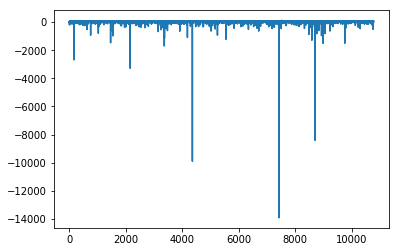

In [13]:
plt.plot(bedit['DiffMeanBonusPercent'])

plt.show()

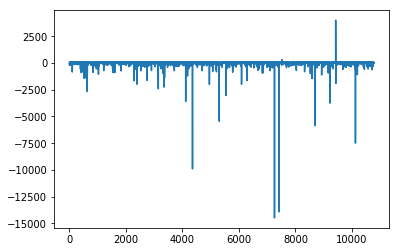

In [14]:
plt.plot(bedit['DiffMedianBonusPercent'])

plt.show()

In [15]:
bedit.describe()

,DiffMeanBonusPercent,DiffMedianBonusPercent,MaleBonusPercent,FemaleBonusPercent
count,9046.000000,9046.000000,9046.000000,9046.000000
mean,18.439001,-0.968715,42.568693,40.932080
std,219.254010,295.663593,36.215489,36.172801
min,-13934.000000,-14490.800000,0.000000,0.000000
25%,0.000000,0.000000,6.300000,4.700000
50%,32.100000,15.550000,35.000000,31.200000
75%,56.675000,43.075000,80.800000,79.075000
max,134.200000,4000.000000,100.000000,100.000000


In [16]:
# remove outliers with 2x standard deviation from the mean
h_thresh = bedit['DiffMedianBonusPercent'].mean() + (2 * bedit['DiffMedianBonusPercent'].std())
l_thresh = bedit['DiffMedianBonusPercent'].mean() - (2 * bedit['DiffMedianBonusPercent'].std())
print(f"Median Mean: {bedit['DiffMedianBonusPercent'].mean()}")
print(f"Median Std: {bedit['DiffMedianBonusPercent'].std()}")
print(f'Outlier thresholds are {h_thresh} and {l_thresh}')

Median Mean: -0.9687154543444564
Median Std: 295.6635934571942
Outlier thresholds are 590.358471460044 and -592.2959023687329


In [17]:
boutliers = bedit[(bedit['DiffMedianBonusPercent'] > h_thresh) | (bedit['DiffMedianBonusPercent'] < l_thresh)]
bmedian = bedit[(bedit['DiffMedianBonusPercent'] <= h_thresh) & (bedit['DiffMedianBonusPercent'] >= l_thresh)]

print(f'Outliers removed: {len(boutliers)}')
print(f'Data points remaining: {len(bmedian)}')

Outliers removed: 62
Data points remaining: 8984


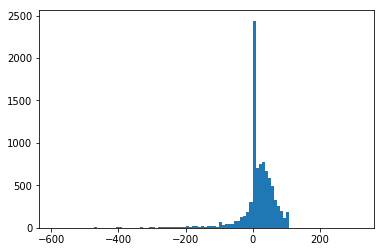

In [18]:
plt.hist(bmedian['DiffMedianBonusPercent'], bins=100)
plt.show()

Data points remaining: 8427


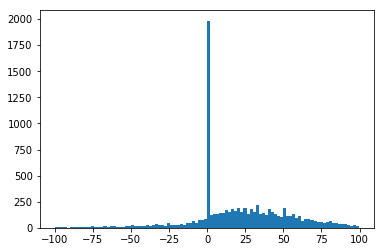

In [28]:
bmediannew = bedit[(bedit['DiffMedianBonusPercent'] < 100) & (bedit['DiffMedianBonusPercent'] > -100)]
print(f'Data points remaining: {len(bmediannew)}')
plt.hist(bmediannew['DiffMedianBonusPercent'], bins=100)
plt.show()

In [19]:
bmedian.iloc[:, 1:].agg(['min', 'max', 'sum'])

,DiffMeanBonusPercent,DiffMedianBonusPercent,MaleBonusPercent,FemaleBonusPercent
min,-3282.4,-590.0,0.0,0.0
max,134.2,316.6,100.0,100.0
sum,214338.4,113845.2,383292.6,368750.2


In [20]:
# Median bonus honestly looks a bit funky; especially with male cap and female outliers
bmedian.loc[bmedian['DiffMedianBonusPercent'].nlargest(10).index]

,EmployerName,DiffMeanBonusPercent,DiffMedianBonusPercent,MaleBonusPercent,FemaleBonusPercent
7524,RED RECRUITMENT PARTNERSHIP LIMITED,134.2,316.6,20.0,21.0
89,ABERDEEN SPORTS VILLAGE LIMITED,100.0,100.0,2.1,0.0
97,Abingdon School,100.0,100.0,1.2,0.0
192,ADNAMS PLC,100.0,100.0,0.7,0.0
310,ALBION FOOTBALL CLUB(BURTON-ON-TRENT)LIMITED(THE),100.0,100.0,11.0,0.0
338,ALL METAL SERVICES LIMITED,100.0,100.0,1.7,0.0
425,AMEC FOSTER WHEELER EARTH AND ENVIRONMENTAL (U...,100.0,100.0,36.4,0.0
451,AMULET (CHURCHILL SECURITY SOLUTIONS) LIMITED,100.0,100.0,3.0,0.0
511,APOGEE CORPORATION LIMITED,81.8,100.0,70.1,26.7
628,ASH & LACY PERFORATING LIMITED,100.0,100.0,5.4,0.0


Mean data points remaining: 8616


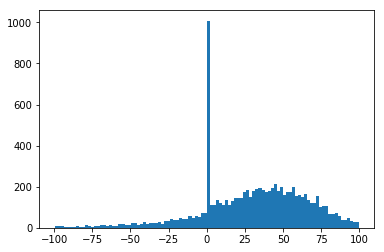

In [27]:
bmean = bedit[(bedit['DiffMeanBonusPercent'] < 100) & (bedit['DiffMeanBonusPercent'] > -100)]

print(f'Mean data points remaining: {len(bmean)}')

plt.hist(bmean['DiffMeanBonusPercent'], bins=100)
plt.show()

In [31]:
print(f"Portion that is zero: {len(bmean[bmean['DiffMeanBonusPercent'] == 0]) / len(bmean)}")

Portion that is zero: 0.10271587743732591
